<a href="https://colab.research.google.com/github/MSimonFRA-UAS/LfDFra-UAS/blob/main/perceptron_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def linear_combination(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # use step function activation as hypothesis
        return np.where(self.linear_combination(X) >= 0.0, 1, -1)

    def train(self, X, y):
        # X is the input data matrix
        # y is the output vector corresponding to input X
        self.w_ = np.zeros(X.shape[1] + 1) # hide the bias in the weight vector
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for x_i, target in zip(X, y):
                w_update = self.eta * (target - self.predict(x_i))
                self.w_[1:] +=  w_update * x_i
                self.w_[0] +=  w_update
                errors += int(w_update != 0.0)
            self.errors_.append(errors)
        return self

In [ ]:
# Load the Iris dataset into a dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head

<bound method NDFrame.head of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

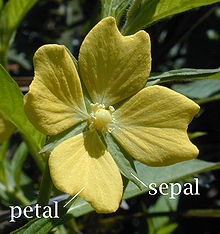 

From English Wikipedia:

Image of a primrose willowherb Ludwigia octovalvis (family Onagraceae), flower showing petals and sepals. Photograph made in Hawai'i by Eric Guinther (Marshman at en.wikipedia) and released under the GNU Free Documentation License.

In [ ]:
# Let's start with a linearly separable example
df = df.sample(frac = 1) # shuffle the data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Consider the features sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [ ]:
#Run perceptron algorithm
p = Perceptron(epochs=10, eta=0.1)
p.train(X, y)
print('Weights: %s' % p.w_)

Weights: [-0.4  -1.06  2.  ]


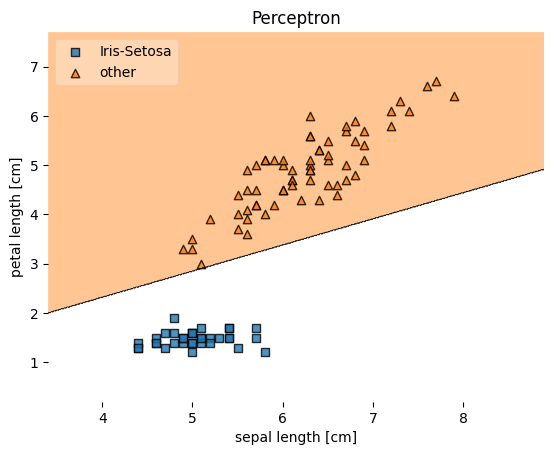

In [ ]:
# Visualize binary classification regions
ax = plot_decision_regions(X, y, clf=p)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Iris-Setosa', 'other',], 
           framealpha=0.3, scatterpoints=1)
plt.show()

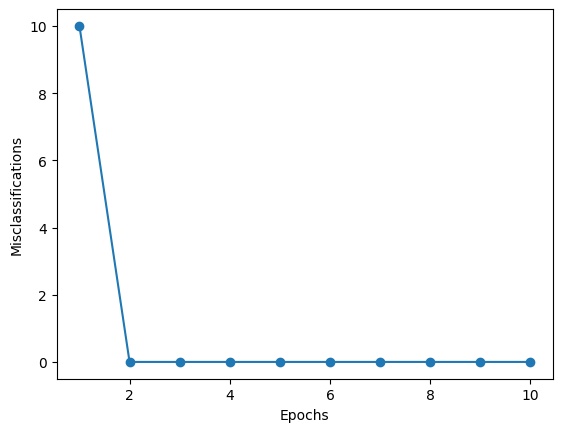

In [ ]:
# Visualize missclassifications
plt.plot(range(1, len(p.errors_)+1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.show()

In [ ]:
# Use the remaining datapoints as test data
y_test = df.iloc[101:150, 4].values

# Consider the features sepal length and petal length
X_test = df.iloc[101:150, [0,2]].values

In [ ]:
# Test generalization
y = p.predict(X_test)
print(np.where(y-np.where(y_test == 'Iris-setosa', -1, 1) == 0,'ok','missclassified'))

['ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok']


In [ ]:
# Now let's study an example which is not linearly separable
df = df.sample(frac = 1) # shuffle the data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

# Consider the features sepal length and sepal width
X = df.iloc[0:100, [0,2]].values

In [ ]:
#Run perceptron algorithm
p = Perceptron(epochs=10, eta=0.1)
p.train(X, y)
print('Weights: %s' % p.w_)

Weights: [ 3.2   5.3  -7.54]


In [ ]:
# Visualize binary classification regions
ax = plot_decision_regions(X, y, clf=p)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Iris-Virginica', 'other',], 
           framealpha=0.3, scatterpoints=1)
plt.show()

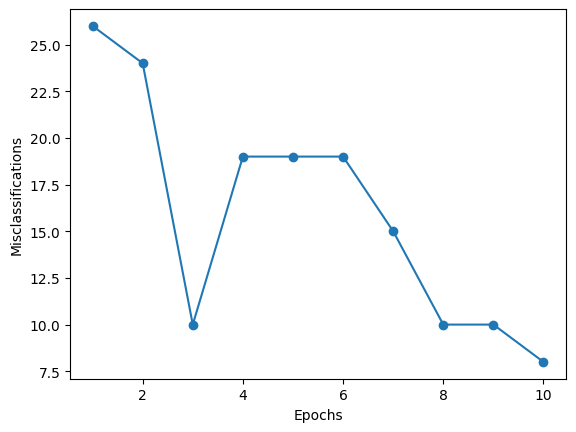

In [ ]:
# Visualize missclassifications
plt.plot(range(1, len(p.errors_)+1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.show()

In [ ]:
# Use the remaining datapoints as test data
y_test = df.iloc[101:150, 4].values

# Consider the features sepal length and petal length
X_test = df.iloc[101:150, [0,2]].values

In [ ]:
# Test generalization
y = p.predict(X_test)
print(np.where(y-np.where(y_test == 'Iris-virginica', -1, 1) == 0,'ok','missclassified'))

['ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'missclassified' 'ok' 'ok' 'ok' 'ok'
 'ok' 'missclassified' 'ok' 'ok' 'ok' 'missclassified' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'missclassified' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok' 'ok'
 'ok']
